In [5]:
import math
import torch
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def response(phi, alpha, sig=1.):
    y = phi.matmul(alpha)
    y = y + torch.randn(y.shape)*sig
    return y

In [91]:
def in_term(phi, sig, s_0):
    in_ = phi.t().matmul(phi) + sig * s_0**(-1)
    return in_.pow(-1)

## Setup Data

In [235]:
nx = 100
x = torch.linspace(0, 1, nx).unsqueeze(-1)
phi = x

alpha = torch.tensor([1., 2.])
sig = 7.
y = x + torch.randn(nx, 1)*0.2

In [236]:
prior_cov = sig

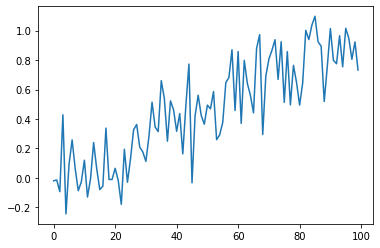

In [237]:
plt.plot(y)

### Begin Modeling

In [238]:
inverse_ = in_term(x, 0.2, prior_cov)
post_var = sig * inverse_

In [239]:
post_var

tensor([[0.2088]])

In [240]:
post_mean = inverse_.matmul(x.t().matmul(y))

In [241]:
post_mean

tensor([[0.9463]])

## generate distributions

In [259]:
domain = torch.linspace(-7, 7, 200)

In [260]:
prior_dist = torch.distributions.Normal(loc=0., scale=math.sqrt(sig))
prior_prob = prior_dist.log_prob(domain).exp().squeeze()

In [261]:
post_dist = torch.distributions.Normal(loc=post_mean, scale=torch.sqrt(post_var))
post_prob = post_dist.log_prob(domain).exp().squeeze()

## Plotting

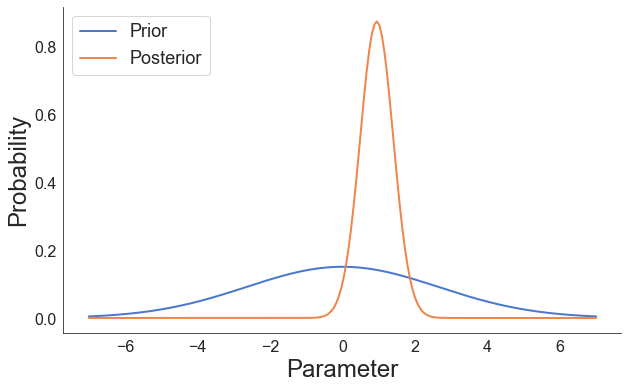

In [271]:
import seaborn as sns
sns.set_style("white")
sns.set_palette("muted")
leg_fs = 18
title_fs = 30
axis_fs = 24
tick_fs = 16

plt.figure(figsize=(10, 6))
plt.plot(domain, prior_prob, label="Prior",
        linewidth=2.)
plt.plot(domain, post_prob, label="Posterior",
        linewidth=2.)

plt.legend(loc="upper left", fontsize=leg_fs)
plt.xlabel("Parameter", fontsize=axis_fs)
plt.ylabel("Probability", fontsize=axis_fs)
plt.xticks(fontsize=tick_fs)
plt.yticks(fontsize=tick_fs)
sns.despine()
plt.savefig("./posterior-contraction.pdf", bbox_inches="tight")